In [152]:
#Date: 27 Sept 2020, Author: Suman Prakash

#imports
import requests
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import numpy as np


#Basic Information to connect with Open Weather Map, OneCall Api, 
#Documentation for the same is available at https://openweathermap.org/api/one-call-api


api_key='d7532a988453f750f07f5d0a26b9fb4c'
api_base_url='https://api.openweathermap.org/data/2.5'
endpoint_path='/onecall'
city_latitude=25.6
city_longitude=85.12
units='metric'
exclude='minutely,hourly'
concat='&'
url=f"{api_base_url}{endpoint_path}?lat={city_latitude}{concat}lon={city_longitude}{concat}exclude={exclude}{concat}appid={api_key}{concat}units={units}"


<bound method NDFrame.head of            dt     sunrise      sunset  \
0  1601184600  1601165403  1601208650   
1  1601271000  1601251827  1601294984   
2  1601357400  1601338251  1601381319   
3  1601443800  1601424675  1601467654   
4  1601530200  1601511099  1601553989   
5  1601616600  1601597524  1601640324   
6  1601703000  1601683949  1601726660   
7  1601789400  1601770375  1601812997   

                                                temp  \
0  {'day': 31.84, 'min': 25.55, 'max': 31.84, 'ni...   
1  {'day': 32.83, 'min': 25.38, 'max': 33.66, 'ni...   
2  {'day': 32.39, 'min': 25.08, 'max': 33.63, 'ni...   
3  {'day': 32.43, 'min': 24.93, 'max': 33.3, 'nig...   
4  {'day': 32.27, 'min': 24.8, 'max': 33.23, 'nig...   
5  {'day': 32.25, 'min': 24.55, 'max': 33.51, 'ni...   
6  {'day': 32.25, 'min': 24.58, 'max': 33.02, 'ni...   
7  {'day': 33.47, 'min': 25.85, 'max': 33.47, 'ni...   

                                          feels_like  pressure  humidity  \
0  {'day': 35.18, '

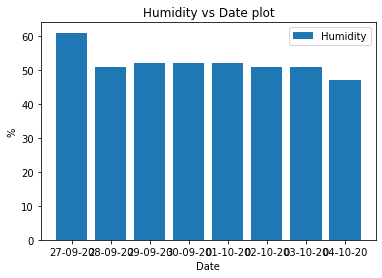

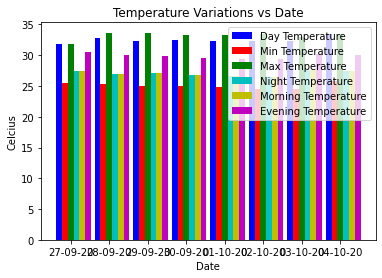

In [153]:
#Requesting API for weather data to extract desired information 
data_from_api = requests.get(url)

#checking a valid response from API and converting fetched data into json format to operate as on dictionaries
if data_from_api.status_code in range (200,299):    
    data=data_from_api.json()
    
#creating a dataframe from the data set response from API for weather report and predictions on daily basis
# and adding them to an excel sheet for reference   
output= "weather.csv"
df=pd.DataFrame(data['daily'])
#print(df.head)
df.to_csv(output, index=False)
data['daily']

#Using date fields in the frame to make a fresh list of dates in 'dd-mm-yy' format
_dates=[]
for values in df['dt']:
    _date = datetime.datetime.fromtimestamp(values).strftime('%d-%m-%y')
    _dates.append(_date)

#processing desired data from dataframe that includes different variations of temperature and humidity on daily basis
humidity= df['humidity']
day_temperature= [temp['day'] for temp in df['temp']]
min_temperature= [temp['min'] for temp in df['temp']]
max_temperature= [temp['max'] for temp in df['temp']]
night_temperature= [temp['night'] for temp in df['temp']]
evening_temperature= [temp['eve']for temp in df['temp']]
morning_temperature= [temp['morn']for temp in df['temp']]

#Plotting a bar graph for Humidity prediction over coming dates with the use of matplotlib library 
plt.bar(_dates,humidity,label='Humidity')
plt.title("Humidity vs Date plot")
plt.xlabel("Date")
plt.ylabel("%")
plt.legend()
plt.show()


#Plotting a bar graph for different variants of temperature vs dates with the use of numpy and matplotlib library 

index=np.arange(8)
bar_width=0.15
Fig, ax= plt.subplots()
bar_daytemp=ax.bar(index-0.3, day_temperature, bar_width, Label="Day Temperature",color='b')
bar_mintemp=ax.bar(index-0.15, min_temperature, bar_width, Label="Min Temperature",color='r')
bar_maxtemp=ax.bar(index, max_temperature, bar_width, Label="Max Temperature",color='g')
bar_nighttemp=ax.bar(index+0.15, night_temperature, bar_width, Label="Night Temperature",color='c')
bar_morningtemp=ax.bar(index+0.3, night_temperature, bar_width, Label="Morning Temperature",color='y')
bar_eveningtemp=ax.bar(index+0.45, evening_temperature, bar_width, Label="Evening Temperature",color='m')

ax.set_xticks(index)
ax.set_xticklabels(_dates)
ax.set_xlabel("Date")
ax.set_ylabel("Celcius")
ax.set_title("Temperature Variations vs Date")
ax.legend([bar_daytemp,bar_mintemp,bar_maxtemp,bar_nighttemp,bar_morningtemp,bar_eveningtemp],
          ['Day Temperature','Min Temperature','Max Temperature','Night Temperature','Morning Temperature','Evening Temperature'])
plt.show()


In [35]:
#import pprint
#pprint.pprint(data_from_api.text)

('{"lat":25.6,"lon":85.12,"timezone":"Asia/Kolkata","timezone_offset":19800,"current":{"dt":1601120537,"sunrise":1601078979,"sunset":1601122316,"temp":26,"feels_like":28.11,"pressure":1001,"humidity":78,"dew_point":21.87,"uvi":10.29,"clouds":40,"visibility":5000,"wind_speed":3.6,"wind_deg":40,"weather":[{"id":721,"main":"Haze","description":"haze","icon":"50d"}]},"daily":[{"dt":1601098200,"sunrise":1601078979,"sunset":1601122316,"temp":{"day":30.78,"min":24.61,"max":30.78,"night":27.4,"eve":27.59,"morn":24.61},"feels_like":{"day":34.74,"night":32.37,"eve":31.19,"morn":28.48},"pressure":1003,"humidity":66,"dew_point":23.88,"wind_speed":2.39,"wind_deg":30,"weather":[{"id":501,"main":"Rain","description":"moderate '
 'rain","icon":"10d"}],"clouds":74,"pop":0.74,"rain":3.71,"uvi":10.29},{"dt":1601184600,"sunrise":1601165403,"sunset":1601208650,"temp":{"day":31.59,"min":25.75,"max":31.82,"night":27.33,"eve":29.44,"morn":25.75},"feels_like":{"day":35.95,"night":31.57,"eve":33.71,"morn":30.58

{'current': {'clouds': 40,
             'dew_point': 21.87,
             'dt': 1601120630,
             'feels_like': 28.11,
             'humidity': 78,
             'pressure': 1001,
             'sunrise': 1601078979,
             'sunset': 1601122316,
             'temp': 26,
             'uvi': 10.29,
             'visibility': 5000,
             'weather': [{'description': 'haze',
                          'icon': '50d',
                          'id': 721,
                          'main': 'Haze'}],
             'wind_deg': 40,
             'wind_speed': 3.6},
 'daily': [{'clouds': 74,
            'dew_point': 23.88,
            'dt': 1601098200,
            'feels_like': {'day': 34.74,
                           'eve': 31.19,
                           'morn': 28.48,
                           'night': 32.37},
            'humidity': 66,
            'pop': 0.74,
            'pressure': 1003,
            'rain': 3.71,
            'sunrise': 1601078979,
            'sunset': 1601

In [39]:
#data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'daily'])

In [60]:
x

<bound method NDFrame.head of            dt     sunrise      sunset  \
0  1601098200  1601078979  1601122316   
1  1601184600  1601165403  1601208650   
2  1601271000  1601251827  1601294984   
3  1601357400  1601338251  1601381319   
4  1601443800  1601424675  1601467654   
5  1601530200  1601511099  1601553989   
6  1601616600  1601597524  1601640324   
7  1601703000  1601683949  1601726660   

                                                temp  \
0  {'day': 30.78, 'min': 24.61, 'max': 30.78, 'ni...   
1  {'day': 31.59, 'min': 25.75, 'max': 31.82, 'ni...   
2  {'day': 32.67, 'min': 25.69, 'max': 32.91, 'ni...   
3  {'day': 32.41, 'min': 24.96, 'max': 33.64, 'ni...   
4  {'day': 32.46, 'min': 24.95, 'max': 33.45, 'ni...   
5  {'day': 32.48, 'min': 25.16, 'max': 33.36, 'ni...   
6  {'day': 32.3, 'min': 24.77, 'max': 33.35, 'nig...   
7  {'day': 32.77, 'min': 24.76, 'max': 32.94, 'ni...   

                                          feels_like  pressure  humidity  \
0  {'day': 34.74, '

[{'dt': 1601098200,
  'sunrise': 1601078979,
  'sunset': 1601122316,
  'temp': {'day': 30.78,
   'min': 24.61,
   'max': 30.78,
   'night': 27.4,
   'eve': 27.59,
   'morn': 24.61},
  'feels_like': {'day': 34.74, 'night': 32.37, 'eve': 31.19, 'morn': 28.48},
  'pressure': 1003,
  'humidity': 66,
  'dew_point': 23.88,
  'wind_speed': 2.39,
  'wind_deg': 30,
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10d'}],
  'clouds': 74,
  'pop': 0.74,
  'rain': 3.71,
  'uvi': 10.29},
 {'dt': 1601184600,
  'sunrise': 1601165403,
  'sunset': 1601208650,
  'temp': {'day': 31.59,
   'min': 25.75,
   'max': 31.82,
   'night': 27.33,
   'eve': 29.44,
   'morn': 25.75},
  'feels_like': {'day': 35.95, 'night': 31.57, 'eve': 33.71, 'morn': 30.58},
  'pressure': 1005,
  'humidity': 62,
  'dew_point': 23.64,
  'wind_speed': 1.59,
  'wind_deg': 314,
  'weather': [{'id': 501,
    'main': 'Rain',
    'description': 'moderate rain',
    'icon': '10d'}],
  'clouds'

In [64]:
#df['humidity']

0    66
1    62
2    56
3    51
4    52
5    51
6    51
7    49
Name: humidity, dtype: int64

In [88]:
#temperature=df['temp']
#temperature[0]['day']

30.78

In [94]:
#import datetime
#_dates=[]
#_average_temperature=[]
#for values in df['dt']:
 #   _date = datetime.datetime.fromtimestamp(values).strftime('%d-%m-%y')
  #  _dates.append(_date)
#print(_dates)
    

['26-09-20', '27-09-20', '28-09-20', '29-09-20', '30-09-20', '01-10-20', '02-10-20', '03-10-20']


0    66
1    62
2    56
3    51
4    52
5    51
6    51
7    49
Name: humidity, dtype: int64 [30.78, 31.59, 32.67, 32.41, 32.46, 32.48, 32.3, 32.77] [24.61, 25.75, 25.69, 24.96, 24.95, 25.16, 24.77, 24.76] [30.78, 31.82, 32.91, 33.64, 33.45, 33.36, 33.35, 32.94] [27.4, 27.33, 26.56, 26.95, 27.08, 26.8, 27.18, 27.39] [27.59, 29.44, 29.79, 29.52, 29.79, 29.53, 29.65, 29.58] [24.61, 25.75, 25.69, 24.96, 24.95, 25.16, 24.77, 24.76]


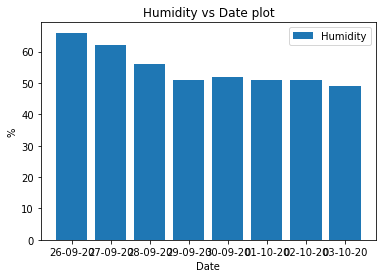

In [151]:
#from matplotlib import pyplot as plt
##humidity= df['humidity']
#day_temperature= [temp['day'] for temp in df['temp']]
#min_temperature= [temp['min'] for temp in df['temp']]
#max_temperature= [temp['max'] for temp in df['temp']]
#night_temperature= [temp['night'] for temp in df['temp']]
#evening_temperature= [temp['eve']for temp in df['temp']]
#morning_temperature= [temp['morn']for temp in df['temp']]

#print(humidity,day_temperature,min_temperature,max_temperature,night_temperature,evening_temperature,morning_temperature)
#plt.bar(_dates,humidity,label='Humidity')
#plt.title("Humidity vs Date plot")
#plt.xlabel("Date")
plt.ylabel("%")
plt.legend()
plt.show()

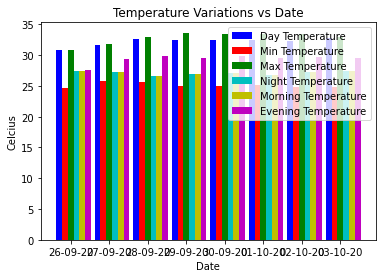

In [145]:
import numpy as np
index=np.arange(8)
bar_width=0.15
Fig, ax= plt.subplots()
bar_daytemp=ax.bar(index-0.3, day_temperature, bar_width, Label="Day Temperature",color='b')
bar_mintemp=ax.bar(index-0.15, min_temperature, bar_width, Label="Min Temperature",color='r')
bar_maxtemp=ax.bar(index, max_temperature, bar_width, Label="Max Temperature",color='g')
bar_nighttemp=ax.bar(index+0.15, night_temperature, bar_width, Label="Night Temperature",color='c')
bar_morningtemp=ax.bar(index+0.3, night_temperature, bar_width, Label="Morning Temperature",color='y')
bar_eveningtemp=ax.bar(index+0.45, evening_temperature, bar_width, Label="Evening Temperature",color='m')

ax.set_xticks(index)
ax.set_xticklabels(_dates)
#plt.bar(_dates,humidity,Label='Humidity')
#plt.bar(_dates,avg_temperature,Label='Temperature',color='g')
ax.set_xlabel("Date")
ax.set_ylabel("Celcius")
ax.set_title("Temperature Variations vs Date")
ax.legend([bar_daytemp,bar_mintemp,bar_maxtemp,bar_nighttemp,bar_morningtemp,bar_eveningtemp],
          ['Day Temperature','Min Temperature','Max Temperature','Night Temperature','Morning Temperature','Evening Temperature'])
plt.show()


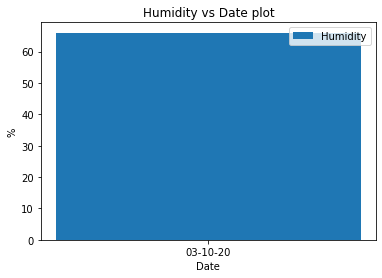

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>